In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn 
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
penguins = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/penguins/penguins.csv")
penguins.head(6)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
penguins["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
penguins.isna().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [7]:
df = penguins.copy() 

In [8]:
df[df['sex'].isna()] 

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [9]:
df.drop(index=[3,271], inplace=True) 
df.reset_index(inplace=True, drop=True) 
df.drop(columns= 'Unnamed: 0', inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [10]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

In [11]:
df.drop(columns='year', inplace=True) 
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [14]:
import scipy.stats as stats

for (colName, colData) in df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].iteritems():
  print("Feature name: {0}, Skewness: {1}".format(colName, stats.skew(colData)))

Feature name: bill_length_mm, Skewness: 0.05288480859327655
Feature name: bill_depth_mm, Skewness: -0.14283462620259435
Feature name: flipper_length_mm, Skewness: 0.3441638335300089
Feature name: body_mass_g, Skewness: 0.4682639641669921


In [15]:
for (colName, colData) in df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].iteritems():
  print("Feature name: {0}, Skewness: {1}".format(colName, stats.kurtosis(colData)))

Feature name: bill_length_mm, Skewness: -0.880764584838206
Feature name: bill_depth_mm, Skewness: -0.911154686323207
Feature name: flipper_length_mm, Skewness: -0.987434426797829
Feature name: body_mass_g, Skewness: -0.7262425917239979


In [16]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


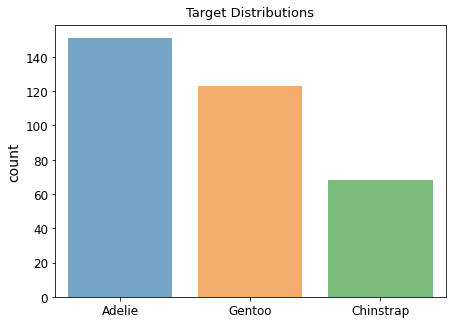

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['species'], alpha = 0.65, saturation=0.85)
plt.title('Target Distributions', size = 13, y = 1.01)
plt.xlabel("")
plt.tick_params(axis='both', labelsize = 12)

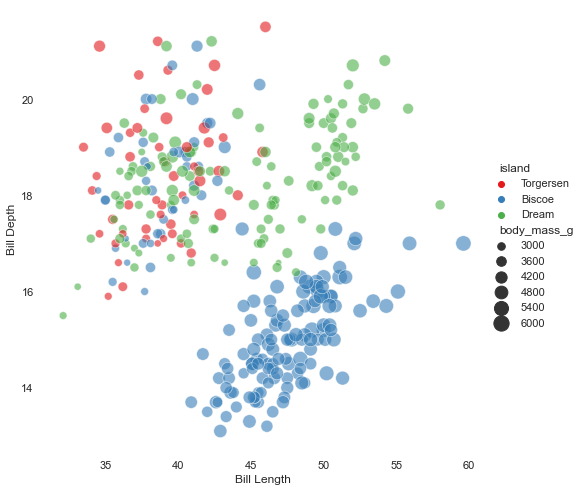

In [18]:
sns.set_theme(style="white")
g = sns.relplot(data=df, alpha = 0.6,
                x="bill_length_mm", y="bill_depth_mm",
                hue="island", size="body_mass_g",
                palette="Set1", sizes=(40, 250),height = 7)

g.despine(left=True, bottom=True)
g.set_axis_labels("Bill Length", "Bill Depth")

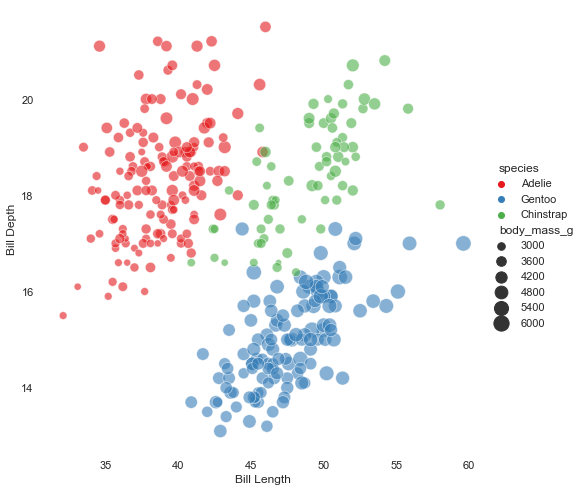

In [19]:
sns.set_theme(style="white")
g = sns.relplot(
    data=df, sizes=(40, 250), alpha = 0.6,
    x="bill_length_mm", y="bill_depth_mm",
    hue="species", size="body_mass_g",
    palette="Set1", height = 7)

g.despine(left=True, bottom=True) 
g.set_axis_labels("Bill Length", "Bill Depth")

In [20]:
df.groupby(['island', 'species'])[['species']].count()

species
island    species           
Biscoe    Adelie          44
          Gentoo         123
Dream     Adelie          56
          Chinstrap       68
Torgersen Adelie          51

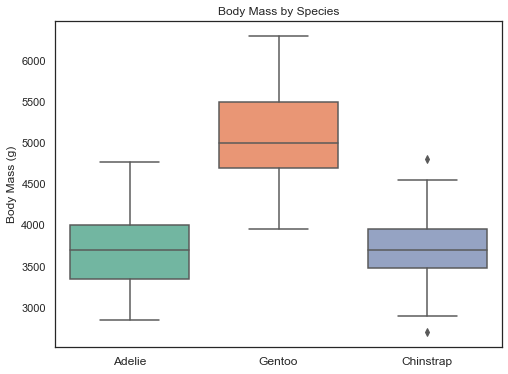

In [21]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='body_mass_g',
                 palette="Set2")
ax.set_ylabel('Body Mass (g)')
ax.set_xlabel("")
ax.set_title('Body Mass by Species')
ax.tick_params(axis='x', labelsize = 12)

Text(0.5, 1.0, 'Bill Depth by Species')

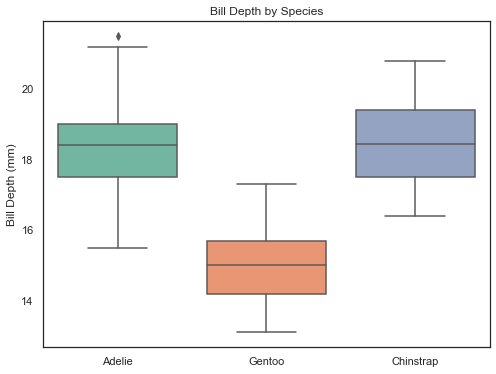

In [22]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='bill_depth_mm',
                 palette="Set2")
ax.set_ylabel('Bill Depth (mm)')
ax.set_xlabel("")
ax.set_title('Bill Depth by Species')

Text(0.5, 1.0, 'Bill length by Species')

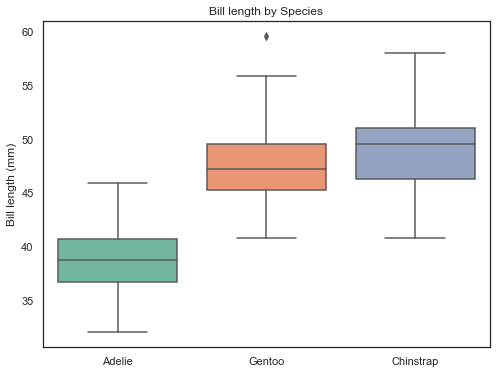

In [23]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='bill_length_mm',
                 palette="Set2")
ax.set_ylabel('Bill length (mm)')
ax.set_xlabel("")
ax.set_title('Bill length by Species')

Text(0.5, 1.0, 'Flipper length by Species')

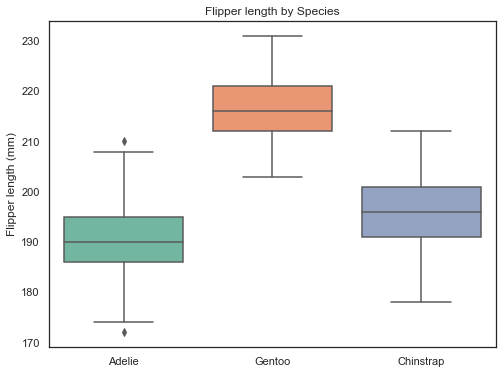

In [24]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='flipper_length_mm',
                 palette="Set2")
ax.set_ylabel('Flipper length (mm)')
ax.set_xlabel("")
ax.set_title('Flipper length by Species')

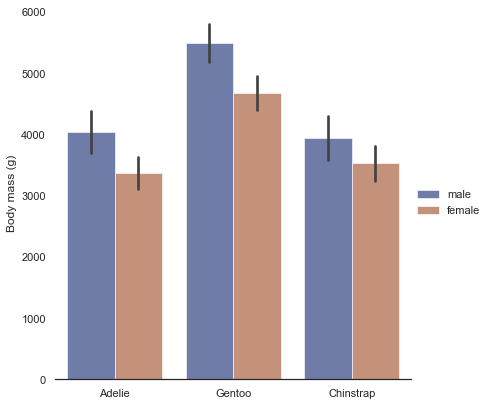

In [25]:
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [26]:
male = df[df['sex'] == 'male']
male_adel_spec = male[male['species'] =='Adelie']
female = df[df['sex'] =='female']
female_adel_spec = female[female['species'] =='Adelie']

body_mass_male = np.array(male_adel_spec['body_mass_g'])
body_mass_female = np.array(female_adel_spec['body_mass_g'])
body_mass_male.std(), body_mass_female.std()

(344.42794038444447, 267.52867026993727)

In [27]:
from scipy.stats import ttest_ind

result = ttest_ind(body_mass_male, body_mass_female, equal_var=False)

print("Since p-value= {:1.4f}, --> reject the null hypothesis".format(result.pvalue))
print("   There is no evidence to suggest that male and female Adelie penguins' mean body weights (g) are equal.")

Since p-value= 0.0000, --> reject the null hypothesis
   There is no evidence to suggest that male and female Adelie penguins' mean body weights (g) are equal.


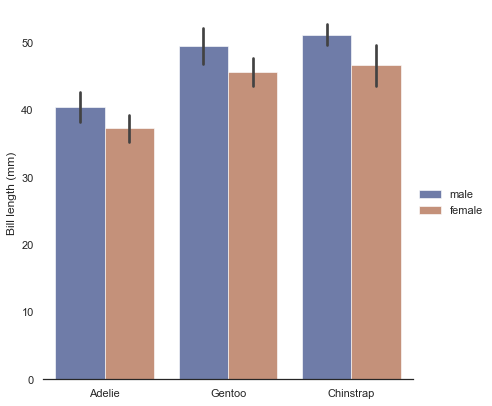

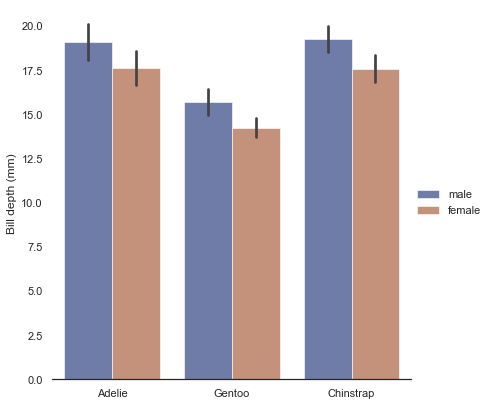

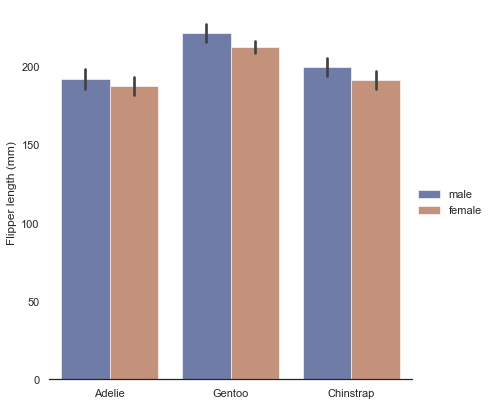

In [28]:
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="bill_length_mm", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Bill length (mm)")
g.legend.set_title("")

g = sns.catplot(
    data=df, kind="bar",
    x="species", y="bill_depth_mm", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Bill depth (mm)")
g.legend.set_title("")

g = sns.catplot(
    data=df, kind="bar",
    x="species", y="flipper_length_mm", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Flipper length (mm)")
g.legend.set_title("")

In [29]:
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
46,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
177,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
217,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
255,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
267,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [31]:
df.groupby(['species', 'sex'])[['sex']].count()

sex
species   sex        
Adelie    female   73
          male     73
Chinstrap female   34
          male     34
Gentoo    female   58
          male     61

In [32]:
bill_len_by_sex_spec = df.groupby(['sex', 'species']).median()['bill_length_mm']
bill_dep_by_sex_spec = df.groupby(['sex', 'species']).median()['bill_depth_mm']
flip_len_by_sex_spec = df.groupby(['sex', 'species']).median()['flipper_length_mm']
body_mass_by_sex_spec = df.groupby(['sex', 'species']).median()['body_mass_g']

for species in set(df['species']):
    for sex in ['female', 'male']:
        print('Median bill length of Species: {}- {}s: {}'.format(species, sex, bill_len_by_sex_spec[sex][species]))
        print('Median bill depth of Species: {}- {}s: {}'.format(species, sex, bill_dep_by_sex_spec[sex][species]))
        print('Median flip length of Species: {}- {}s: {}'.format(species, sex, flip_len_by_sex_spec[sex][species]))
        print('Median body mass of Species: {}- {}s: {}'.format(species, sex, body_mass_by_sex_spec[sex][species]))
        print('-------------------------------------------------------')
print("-------------")

print('Median bill length of all Species: {}'.format(df['bill_length_mm'].median()))
print('Median bill depth of all Species: {}'.format(df['bill_depth_mm'].median()))
print('Median flip length of all Species: {}'.format(df['flipper_length_mm'].median()))
print('Median body mass of all Species: {}'.format(df['body_mass_g'].median()))

Median bill length of Species: Chinstrap- females: 46.3
Median bill depth of Species: Chinstrap- females: 17.65
Median flip length of Species: Chinstrap- females: 192.0
Median body mass of Species: Chinstrap- females: 3550.0
-------------------------------------------------------
Median bill length of Species: Chinstrap- males: 50.95
Median bill depth of Species: Chinstrap- males: 19.299999999999997
Median flip length of Species: Chinstrap- males: 200.5
Median body mass of Species: Chinstrap- males: 3950.0
-------------------------------------------------------
Median bill length of Species: Adelie- females: 37.0
Median bill depth of Species: Adelie- females: 17.6
Median flip length of Species: Adelie- females: 188.0
Median body mass of Species: Adelie- females: 3400.0
-------------------------------------------------------
Median bill length of Species: Adelie- males: 40.6
Median bill depth of Species: Adelie- males: 18.9
Median flip length of Species: Adelie- males: 193.0
Median body

In [33]:
sex_map = {'male': 0,
           'female': 1}
sex_map

{'male': 0, 'female': 1}

In [34]:
 df2 = df.copy()
df2['Sex'] = df2['sex'].map(sex_map)
df2.drop(columns=['species', 'island', 'sex'], inplace=True)
df_array_imp = np.array(df2)

In [35]:
from sklearn.preprocessing import MinMaxScaler

preprocess = MinMaxScaler()
array_norm = preprocess.fit_transform(df_array_imp) # fits to data, then transforms it
array_norm

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 0.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 1.        ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111, 0.        ],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889, 0.        ],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111, 1.        ]])

In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
df_array_imp= imputer.fit_transform(array_norm)
df_imputed = pd.DataFrame(df_array_imp, columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'])

In [37]:
df['sex'] = df_imputed['sex'].astype(int)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [38]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [39]:
sex_map = {0: 'male',
           1: 'female'}
df['sex'] = df['sex'].map(sex_map)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


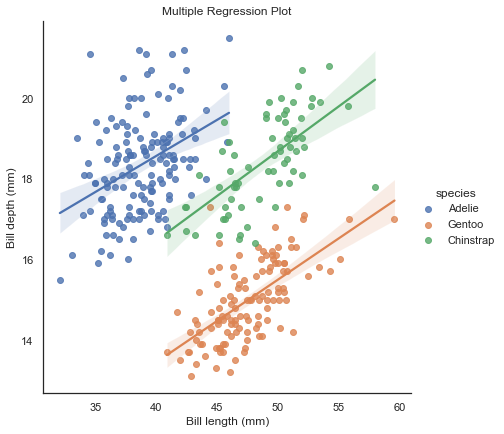

In [40]:
g = sns.lmplot(data=df,
               x='bill_length_mm', y = 'bill_depth_mm', 
               hue = 'species', height=6)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)')
g.set(title = "Multiple Regression Plot")

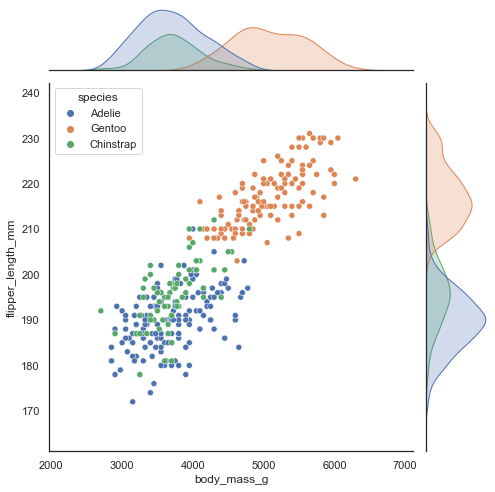

In [41]:
g = sns.jointplot(x= 'body_mass_g', y = 'flipper_length_mm',
                  data = df, 
                  color = 'm', height = 7, hue = 'species')

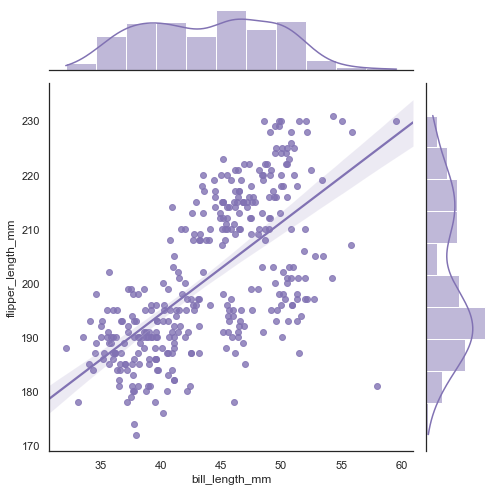

In [42]:
g = sns.jointplot(x= 'bill_length_mm', y = 'flipper_length_mm',
                  data = df, kind = 'reg', truncate = False,
                  color = 'm', height = 7)

[Text(0, 0.5, '')]

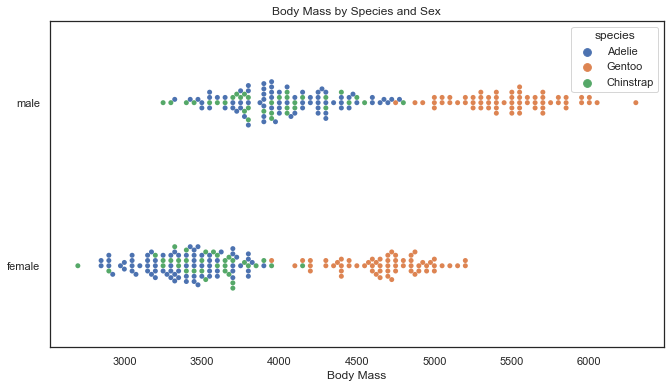

In [43]:
ax = plt.figure(figsize=(11,6))
ax = sns.swarmplot(data=df, x = 'body_mass_g', y = 'sex', hue = 'species')
ax.set(xlabel='Body Mass')
ax.set(title = 'Body Mass by Species and Sex')
ax.set(ylabel='')

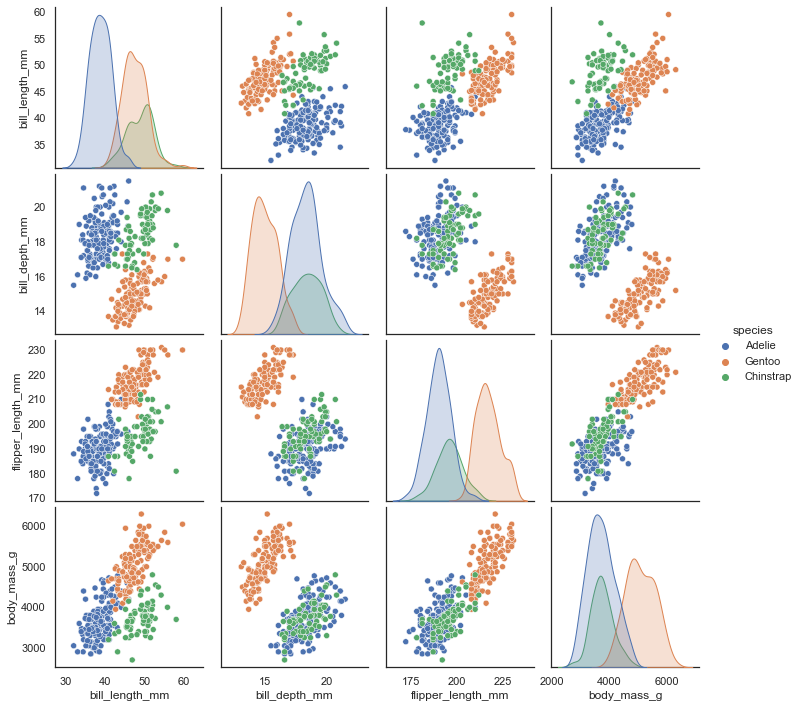

In [44]:
sns.set_theme(style='white')
sns.pairplot(df, hue='species')

In [45]:
species_map = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}

df2 = df.copy()

df2['target'] = df2['species'].map(species_map) 
X = np.array(df2['flipper_length_mm']).reshape(-1,1)
y = (df2['target'] == 1).astype(np.int) # 1 if Gentoo, else 0
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs', random_state = 5)

log_reg.fit(X, y)

<ipython-input-45-5c62012cedc2>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (df2['target'] == 1).astype(np.int) # 1 if Gentoo, else 0


LogisticRegression(random_state=5)

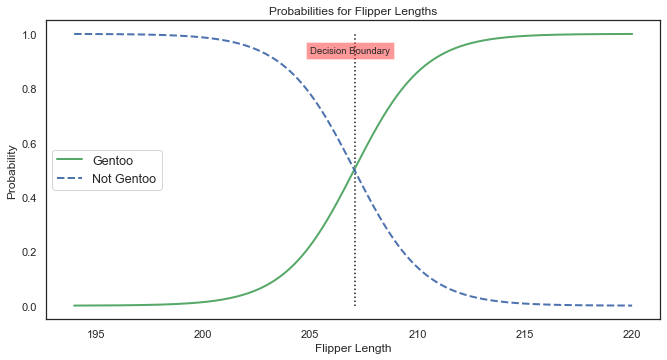

In [46]:
X_new = np.linspace(194, 220, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1]>=0.5][0]

plt.figure(figsize=(11, 5.5))
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=1.5)
plt.plot(X_new, y_proba[:,1], "g-", linewidth = 2, label = "Gentoo")
plt.plot(X_new, y_proba[:,0], "b--", linewidth = 2, label = "Not Gentoo")
plt.title("Probabilities for Flipper Lengths")
plt.xlabel("Flipper Length")
plt.ylabel("Probability")
plt.legend(loc="center left", fontsize=12.5)
plt.text(205, .93, "Decision Boundary", fontsize = 9.5, bbox=dict(facecolor = 'red', alpha = 0.40))
plt.show()

In [47]:
decision_boundary = X_new[y_proba[:, 1]>=0.5][0]
print("For this model, the decision boundary for flipper length is:", str(decision_boundary[0]))

print(" -This means flipper lengths above this value will be classified as a Gentoo")

For this model, the decision boundary for flipper length is: 207.06506506506506
 -This means flipper lengths above this value will be classified as a Gentoo


In [48]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [49]:
df_array = np.array(df2)
X = df_array[:, (2,3)] 

X = X /10

log_reg = LogisticRegression(solver='lbfgs', C=10**5, random_state=5) 

log_reg.fit(X, y)

LogisticRegression(C=100000, random_state=5)

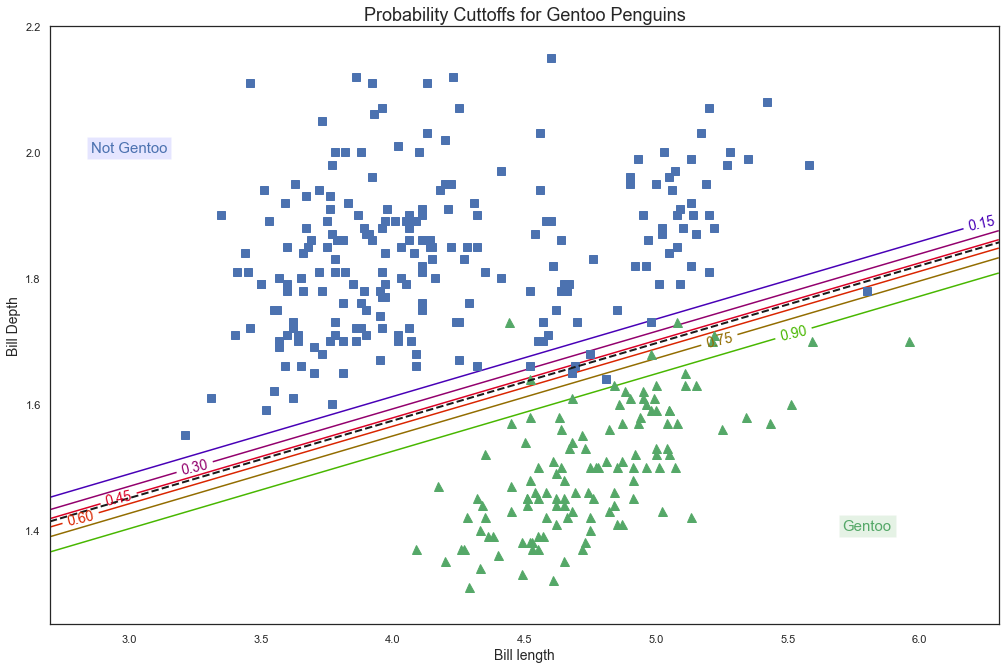

In [50]:
x0, x1 = np.meshgrid(
    np.linspace(2.7, 6.3, 500).reshape(-1,1),
    np.linspace(1, 2.2, 500).reshape(-1,1)
    )

X_new = np.c_[x0.ravel(), x1.ravel()] # concatenate arrays along second axis

y_proba = log_reg.predict_proba(X_new) # predict using new data

plt.figure(figsize=(17,11))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", markersize = 8)
plt.plot(X[y==1, 0], X[y==1, 1], "g^", markersize = 9)

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)

left_right = np.array([2,7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=14)
plt.plot(left_right, boundary, "k--", linewidth=2)
plt.text(3, 2, "Not Gentoo", fontsize=15, color="b", ha="center", bbox=dict(facecolor = 'blue', alpha = 0.10))
plt.text(5.8, 1.4, "Gentoo", fontsize=15, color="g", ha="center", bbox=dict(facecolor = 'green', alpha = 0.10))
plt.xlabel("Bill length", fontsize=14)
plt.ylabel("Bill Depth", fontsize=14)
plt.axis([2.7, 6.3, 1.25, 2.2])
plt.title("Probability Cuttoffs for Gentoo Penguins", fontsize = 18)
plt.show()

In [51]:
y = np.array(df2['target'])

In [52]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)

softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [53]:
x0, x1 = np.meshgrid(
    np.linspace(2.7, 6.3, 500).reshape(-1,1),
    np.linspace(1, 2.2, 500).reshape(-1,1)
    )

X_new = np.c_[x0.ravel(), x1.ravel()] 

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 =y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

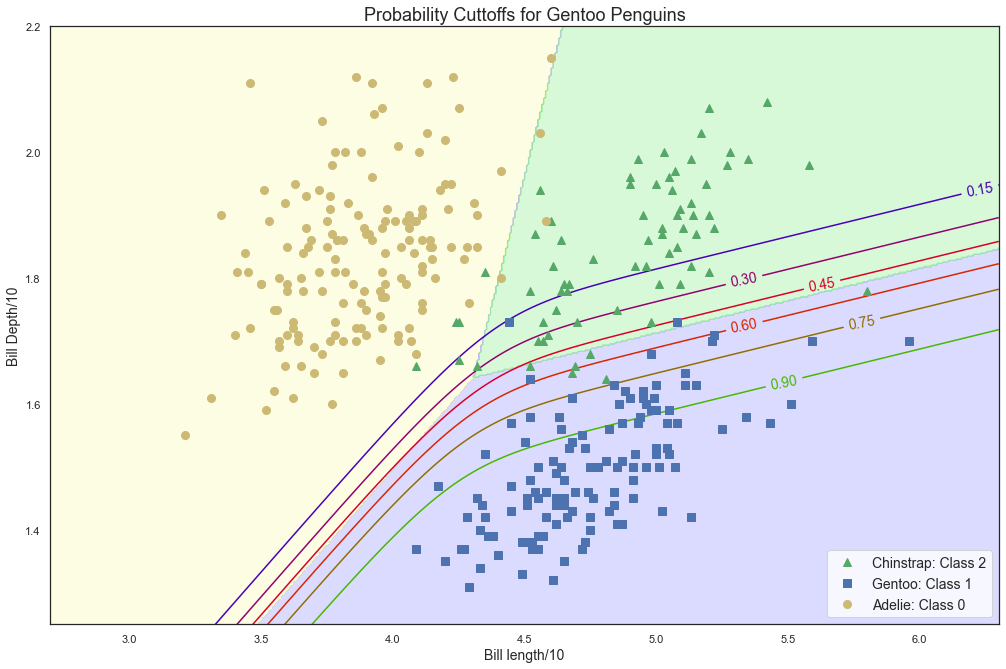

In [54]:
plt.figure(figsize=(17, 11))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Chinstrap: Class 2", markersize = 8)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Gentoo: Class 1", markersize = 8)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Adelie: Class 0", markersize = 8)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff','lightgreen'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha = 0.35)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=14)
plt.xlabel("Bill length/10", fontsize=14)
plt.ylabel("Bill Depth/10", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([2.7, 6.3, 1.25, 2.2])
plt.title("Probability Cuttoffs for Gentoo Penguins", fontsize = 18)
plt.show()

In [55]:
divisor = 10
b_len = 50 / divisor
b_depth = 18 / divisor

print("--------------------------------------")
print("Original Values: ")
print(" Bill Length = 50mm; Bill Depth = 18")
print("")
print("Plotting Coordinates:")
print(" Bill Length = ",b_len)
print(" Bill Depth = ", b_depth)
print("--------------------------------------")
print("With a bill length of 50, and depth of 18, the predicted class would be: ", 
      softmax_reg.predict([[b_len, b_depth]])[0])

--------------------------------------
Original Values: 
 Bill Length = 50mm; Bill Depth = 18

Plotting Coordinates:
 Bill Length =  5.0
 Bill Depth =  1.8
--------------------------------------
With a bill length of 50, and depth of 18, the predicted class would be:  2


In [56]:
df = penguins.copy()
df_strat = df.copy()
df.drop(columns=['year','Unnamed: 0'],inplace = True)

features = list(df.columns)
df =df.reindex(columns=features)
features

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [57]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
y = df.pop('species')
X = df.copy()

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Training sample length: ", len(X_train))
print("Validation sample length: ", len(X_val))
print("----------------------------------")
print("Training shape: ", X_train.shape)
print("Validation length: ", X_val.shape)
print('---------------------------')
print("Target sample length: ", y_train.shape)
print("Target sample length: ", y_val.shape)

Training sample length:  275
Validation sample length:  69
----------------------------------
Training shape:  (275, 6)
Validation length:  (69, 6)
---------------------------
Target sample length:  (275,)
Target sample length:  (69,)


In [60]:
y_val.value_counts() / len(y_val)

Adelie       0.463768
Gentoo       0.318841
Chinstrap    0.217391
Name: species, dtype: float64

In [61]:
y_train.value_counts() / len(y_train)

Adelie       0.436364
Gentoo       0.370909
Chinstrap    0.192727
Name: species, dtype: float64

In [62]:
train, test = train_test_split(df_strat, test_size = 0.2, random_state = 5)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

for train_index, test_index in split.split(df_strat, df_strat['species']):
  strat_train_set = df_strat.loc[train_index]
  strat_test_set = df_strat.loc[test_index]
strat_test_set['species'].value_counts() / len(strat_test_set)

Adelie       0.434783
Gentoo       0.362319
Chinstrap    0.202899
Name: species, dtype: float64

In [63]:
strat_train_set['species'].value_counts() / len(strat_train_set)

Adelie       0.443636
Gentoo       0.360000
Chinstrap    0.196364
Name: species, dtype: float64

In [64]:
def income_cat_proportions(data):
    return data["species"].value_counts() / len(data)
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df_strat),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Adelie,0.441860,0.434783,0.463768,4.958047,-1.601831
Chinstrap,0.197674,0.202899,0.217391,9.974425,2.642796
Gentoo,0.360465,0.362319,0.318841,-11.547452,0.514259


In [65]:
X_train_strat = strat_train_set.copy()
X_test_strat = strat_test_set.copy()

y_train_strat = X_train_strat.pop('species')
y_test_strat = X_test_strat.pop('species')

X_train_strat.drop(columns='year', inplace=True)
X_test_strat.drop(columns='year', inplace=True)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[ 
    ('num', numeric_transformer, selector(dtype_exclude="object")),
    ('cat', cat_transformer, selector(dtype_exclude="float64"))
])
X_train = preprocessor.fit_transform(X_train_strat)

X_test = preprocessor.transform(X_test_strat)

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier()]
y_train = y_train_strat.copy()
species_map = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
y_train = np.array(y_train.map(species_map))
y_test = np.array(y_test_strat.map(species_map))

In [68]:
for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  print(name,':',clf.score(X_test, y_test))
  print('---------')

Nearest Neighbors : 0.9855072463768116
---------
Linear SVM : 0.9855072463768116
---------
RBF SVM : 0.927536231884058
---------
Decision Tree : 1.0
---------
Random Forest : 0.8985507246376812
---------
Neural Net : 0.9855072463768116
---------
AdaBoost : 0.9855072463768116
---------


In [69]:
clf_nearestN = KNeighborsClassifier(3)
clf_rf = DecisionTreeClassifier(max_depth=7)
clf_nn = MLPClassifier(alpha=1, max_iter=1000)

clf_nearestN.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_nn.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [70]:
clf_nearestN = KNeighborsClassifier(3)
clf_rf = DecisionTreeClassifier(max_depth=7)
clf_nn = MLPClassifier(alpha=1, max_iter=1000)

clf_nearestN.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_nn.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("_______________________________________________________________________")
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

        print("_______________________________________________________________________")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


print_score(clf_nearestN, X_train, y_train, X_test, y_test, train=True)
print_score(clf_nearestN, X_train, y_train, X_test, y_test, train=False)
print_score(clf_rf, X_train, y_train, X_test, y_test, train=True)
print_score(clf_rf, X_train, y_train, X_test, y_test, train=False)
print_score(clf_nn, X_train, y_train, X_test, y_test, train=True)
print_score(clf_nn, X_train, y_train, X_test, y_test, train=False)

_______________________________________________________________________
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1     2  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0       1.0        1.0           1.0
support    122.0  99.0  54.0       1.0      275.0         275.0
_______________________________________________
Confusion Matrix: 
 [[122   0   0]
 [  0  99   0]
 [  0   0  54]]

_______________________________________________________________________
Test Result:
Accuracy Score: 98.55%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.933333  0.985507   0.977778      0.986473
recall      1.0   0.960000   1.000000  0.985507   0.986667 

In [72]:
df = penguins.copy()
df.drop(columns='year', inplace=True)
df.drop(index=[3,271], inplace=True) # drop records inplace
df.reset_index(inplace=True, drop=True) # reset index and drop old index

y = df.pop('species')
y = np.array(y.map(species_map))
from sklearn.decomposition import PCA
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

pca_pipe = PCA(n_components=3)

preprocessor = ColumnTransformer(
    transformers = [
      ('num', numeric_transformer, selector(dtype_exclude="object")),
      ('cat', cat_transformer, selector(dtype_include='object'))])

clf_rf_final = Pipeline(steps=[ 
    ('preprocessor', preprocessor),
    ('pca', pca_pipe),
    ('classifier', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2))
])
clf_rf_final.fit(df, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x162703fd0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
 

In [73]:
clf_rf_final.score(df, y)

1.0